# Transfer Learning 
In this file of code, I will use VGG which is trained on Imagenet dataset.
<h2>Pretrained VGG</h2>
We need to download the VGG model which trained before in a forlder on your training machine. Like the code below. The line for the download is 

urlretrieve(
            'https://s3.amazonaws.com/content.udacity-data.com/nd101/vgg16.npy',
            vgg_dir + 'vgg16.npy',
            pbar.hook)
            
the around code are to be sure about the existance of the model file and adding the progress bar for the download

In [18]:
from google.colab import drive
drive.mount('/transfer_learning')
import os
os.chdir("/transfer_learning/My Drive/transfer_learning")
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm


Drive already mounted at /transfer_learning; to attempt to forcibly remount, call drive.mount("/transfer_learning", force_remount=True).


# Download Dataset
We need to download the dataset that we need to work on. Our dataset will be flowers

In [0]:
import tarfile

dataset_folder_path = '/transfer_learning/My Drive/transfer_learning/flower_photos'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

### download flower data

if not isfile('flower_photos.tar.gz'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='Flowers Dataset') as pbar:
        urlretrieve(
            'http://download.tensorflow.org/example_images/flower_photos.tgz',
            'flower_photos.tar.gz',
            pbar.hook)

if not isdir(dataset_folder_path):
    with tarfile.open('flower_photos.tar.gz') as tar:
        tar.extractall()
        tar.close()


# Preparing the data to train and test

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os

import tensorflow as tf
from tensorflow import keras
print("TensorFlow version is ", tf.__version__)

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

TensorFlow version is  1.14.0


In [0]:
data_dir = '/transfer_learning/My Drive/transfer_learning/flower_photos/'
contents = os.listdir(data_dir)
classes = [each for each in contents if os.path.isdir(data_dir + each)]


In [0]:
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

### adding the directories of all classes in flower for training data
train_daisy_dir = os.path.join(train_dir, 'daisy')
print ('Total training daisy flower images:', len(os.listdir(train_daisy_dir)))

train_dandelion_dir = os.path.join(train_dir, 'dandelion')
print ('Total training dandelion flower images:', len(os.listdir(train_dandelion_dir)))

train_roses_dir = os.path.join(train_dir, 'roses')
print ('Total training roses flower images:', len(os.listdir(train_roses_dir)))

train_sunflowers_dir = os.path.join(train_dir, 'sunflowers')
print ('Total training sunflowers flower images:', len(os.listdir(train_sunflowers_dir)))

train_tulips_dir = os.path.join(train_dir, 'tulips')
print ('Total training tulips flower images:', len(os.listdir(train_tulips_dir)))




Total training daisy flower images: 577
Total training dandelion flower images: 838
Total training roses flower images: 583
Total training sunflowers flower images: 642
Total training tulips flower images: 747


In [0]:
### adding the directories of all classes in flower for testing data
test_daisy_dir = os.path.join(test_dir, 'daisy')
print ('Total test daisy flower images:', len(os.listdir(test_daisy_dir)))

test_dandelion_dir = os.path.join(test_dir, 'dandelion')
print ('Total test dandelion flower images:', len(os.listdir(test_dandelion_dir)))

test_roses_dir = os.path.join(test_dir, 'roses')
print ('Total test roses flower images:', len(os.listdir(test_roses_dir)))

test_sunflowers_dir = os.path.join(test_dir, 'sunflowers')
print ('Total test sunflowers flower images:', len(os.listdir(test_sunflowers_dir)))

test_tulips_dir = os.path.join(test_dir, 'tulips')
print ('Total test tulips flower images:', len(os.listdir(test_tulips_dir)))

Total test daisy flower images: 56
Total test dandelion flower images: 60
Total test roses flower images: 58
Total test sunflowers flower images: 57
Total test tulips flower images: 60


# Data augmentation

In [0]:
batch_size = 32


# making data augmentation to make more variation in the data
train_datagen = keras.preprocessing.image.ImageDataGenerator(
                rescale=1./255,
                featurewise_center=True,
                featurewise_std_normalization=True,
                rotation_range=20,
                width_shift_range=0.2,
                height_shift_range=0.2,
                horizontal_flip=True)

test_datagen = keras.preprocessing.image.ImageDataGenerator(
                rescale=1./255,
                featurewise_center=True,
                featurewise_std_normalization=True,
                rotation_range=30,
                width_shift_range=0.5,
                height_shift_range=0.5,
                horizontal_flip=True)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
                train_dir,  # Source directory for the training images
                target_size=(160, 160), ## this size can be any size suitable for you
                batch_size=batch_size,
                classes = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'],
                # it can be binary if the class are two. If more the mode will be categorical
                class_mode='categorical')

# Flow test images in batches of 20 using test_datagen generator
test_generator = test_datagen.flow_from_directory(
                test_dir, # Source directory for the validation images
                target_size=(160,160),## this size can be any size suitable for you
                batch_size=batch_size,
                classes = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'],
                # it can be binary if the class are two. If more the mode will be categorical
                class_mode='categorical')



Found 3387 images belonging to 5 classes.
Found 291 images belonging to 5 classes.


# Calling the pretrained model

In [0]:
IMG_SHAPE = (160, 160, 3) ## this must be the same size that we wrote in the previous cell in target_size

# Create the xception model
mobilenet_model = keras.applications.mobilenet.MobileNet(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet',
                                              classes=5)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
17227776/17225924 [==============================] - 0s 0us/step


In [0]:
mobilenet_model.summary()

Model: "mobilenet_1.00_160"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 161, 161, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 80, 80, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 80, 80, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 80, 80, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 80, 80, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 80, 80, 32) 

In [0]:
model = tf.keras.Sequential([
  mobilenet_model,
  keras.layers.GlobalAveragePooling2D(),
  keras.layers.Dense(5, activation='softmax') ## dense shoul have the number of outputs
])


# Compile the model

In [0]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [0]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_160 (Model)   (None, 5, 5, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 5125      
Total params: 3,233,989
Trainable params: 3,212,101
Non-trainable params: 21,888
_________________________________________________________________


In [14]:
checkpoint_path = "transfer_learing.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

epochs = 10
steps_per_epoch = train_generator.n // batch_size
test_steps = test_generator.n // batch_size

history = model.fit_generator(train_generator,
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs,
                              workers=4,
                              validation_data=test_generator,
                              validation_steps=test_steps)


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


105/105 [==============================] - 559s 5s/step - loss: 0.5745 - acc: 0.7949 - val_loss: 1.0735 - val_acc: 0.6285
Epoch 2/10
105/105 [==============================] - 507s 5s/step - loss: 0.2676 - acc: 0.9103 - val_loss: 0.5288 - val_acc: 0.8090
Epoch 3/10
105/105 [==============================] - 501s 5s/step - loss: 0.1779 - acc: 0.9380 - val_loss: 0.5375 - val_acc: 0.8160
Epoch 4/10
105/105 [==============================] - 505s 5s/step - loss: 0.1230 - acc: 0.9580 - val_loss: 0.4936 - val_acc: 0.8160
Epoch 5/10
105/105 [==============================] - 505s 5s/step - loss: 0.0940 - acc: 0.9621 - val_loss: 0.3864 - val_acc: 0.8715
Epoch 6/10
105/105 [==============================] - 505s 5s/step - loss: 0.0614 - acc: 0.9830 - val_loss: 0.3974 - val_acc: 0.8854
Epoch 7/10
105/105 [==============================] - 506s 5s/step - loss: 0.0629 - acc: 0.9776 - val_loss: 0.4113 - val_acc: 0.8438
Epoch 8/10
105/105 [==============================] - 508s 5s/step - loss: 0.036

In [0]:
# saving models

# save as JSON
json_string = model.to_json()

# save as YAML
yaml_string = model.to_yaml()

## saving weights
model.save_weights('transfer_learning.h5')

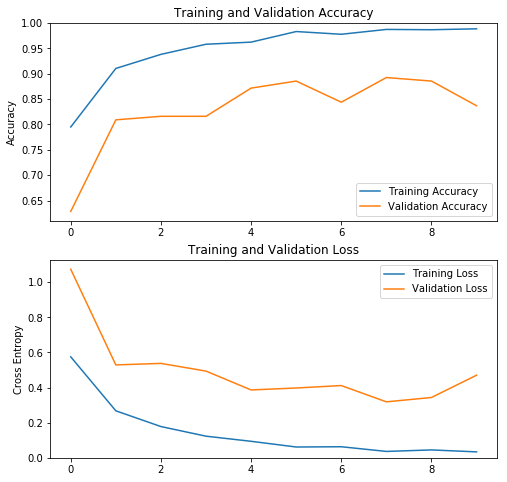

In [17]:
# draw statistics for the model

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()
